In [1]:
# A lot of code here is simplified and sourced from https://nextjournal.com/gkoehler/digit-recognition-with-keras

In [182]:
%matplotlib inline
# %matplotlib ipympl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=12,12

import numpy as np
from keras.utils import np_utils

In [181]:
from keras.datasets import mnist

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation

import tensorflow as tf

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

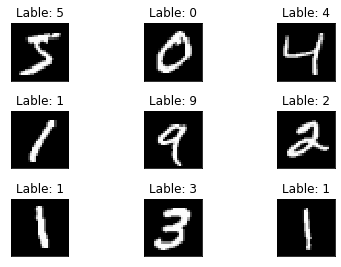

In [5]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Lable: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# Reshape into input vector instead of input matrix

X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train_flat.shape

(60000, 784)

In [9]:
# 255 Channels so a range of 255 for black to white
np.amax(X_train) - np.amin(X_train)

255.0

In [10]:
# We normalise to get x between 0 and 1
X_train_norm = X_train_flat / 255
X_test_norm = X_test_flat / 255
np.amax(X_train_norm) - np.amin(X_train_norm)

1.0

Text(0, 0.5, 'Density')

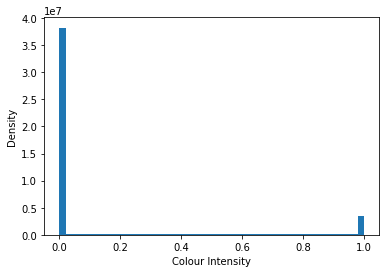

In [11]:
# Distribution of Pixel Values
plt.hist(X_train_norm.flatten(), bins = (50))
plt.xlabel('Colour Intensity')
plt.ylabel('Density')

In [12]:
# Training values into catogories

n_classes = 10
print(y_train[2])
y_train_norm = np_utils.to_categorical(y_train, n_classes)
y_test_norm = np_utils.to_categorical(y_test, n_classes)
print(y_train_norm[2])
print([0,1,2,3,4,5,6,7,8,9])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [162]:
model = Sequential()

# We specify we expect 784 input nodes (the number of pixels)
# Add a 5 node hidden layer
model.add(Dense(30, activation="relu", input_shape=(784,), name="1"))

# Add a 5 node hidden layer
model.add(Dense(5, activation="relu"))

# Add a 10 node hidden layer
model.add(Dense(10))

# Convert from 10 numbers into relative probability (So total probability of each digit = 1)
model.add(Activation('softmax'))

In [163]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [164]:
history = model.fit(X_train_norm, y_train_norm,
          batch_size=64, epochs=10,
          verbose=2,
          validation_data=(X_test_norm, y_test_norm))

Epoch 1/10
938/938 - 3s - loss: 0.8488 - accuracy: 0.7402 - val_loss: 0.4097 - val_accuracy: 0.8800
Epoch 2/10
938/938 - 3s - loss: 0.3111 - accuracy: 0.9150 - val_loss: 0.2489 - val_accuracy: 0.9330
Epoch 3/10
938/938 - 2s - loss: 0.2299 - accuracy: 0.9368 - val_loss: 0.2059 - val_accuracy: 0.9422
Epoch 4/10
938/938 - 2s - loss: 0.1928 - accuracy: 0.9472 - val_loss: 0.1848 - val_accuracy: 0.9492
Epoch 5/10
938/938 - 2s - loss: 0.1683 - accuracy: 0.9530 - val_loss: 0.1665 - val_accuracy: 0.9546
Epoch 6/10
938/938 - 3s - loss: 0.1516 - accuracy: 0.9571 - val_loss: 0.1626 - val_accuracy: 0.9552
Epoch 7/10
938/938 - 2s - loss: 0.1388 - accuracy: 0.9619 - val_loss: 0.1594 - val_accuracy: 0.9573
Epoch 8/10
938/938 - 2s - loss: 0.1285 - accuracy: 0.9640 - val_loss: 0.1505 - val_accuracy: 0.9592
Epoch 9/10
938/938 - 2s - loss: 0.1197 - accuracy: 0.9657 - val_loss: 0.1507 - val_accuracy: 0.9585
Epoch 10/10
938/938 - 2s - loss: 0.1123 - accuracy: 0.9683 - val_loss: 0.1468 - val_accuracy: 0.9587

In [165]:
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])

Training Loss: 0.1123381108045578
Training Accuracy: 0.9682833552360535


In [166]:
print("Test Accuracy:", model.evaluate(X_test_norm, y_test_norm)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1468 - accuracy: 0.9587
Test Accuracy: 0.9587000012397766


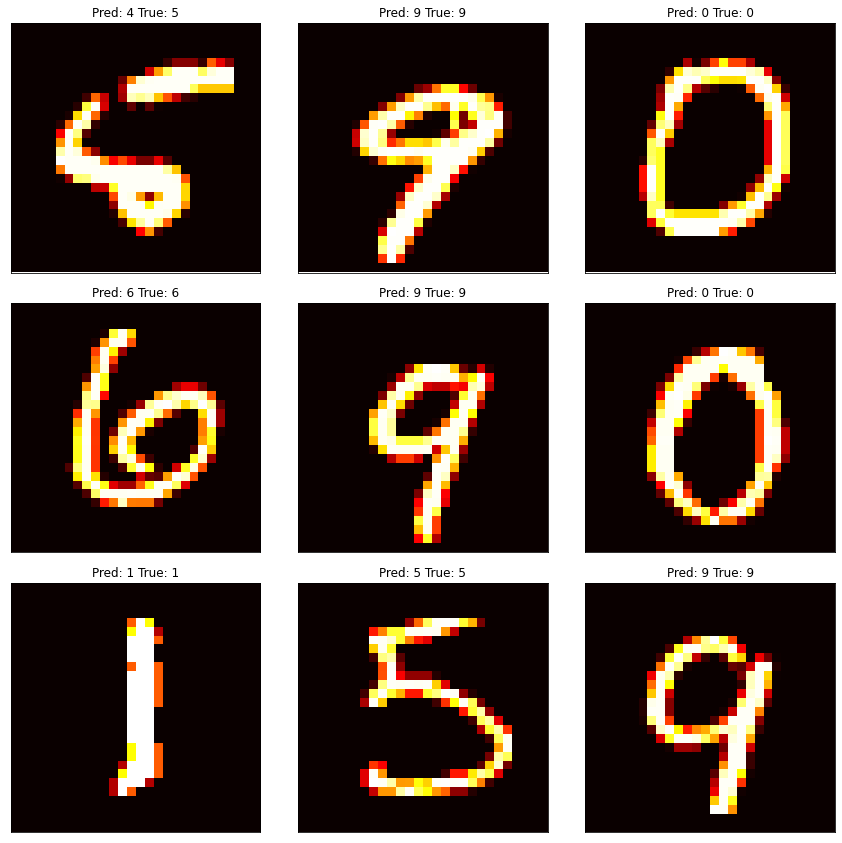

In [170]:
y_pred = model.predict(X_test_norm)


fig = plt.figure()
for i in range(8,17):
  plt.subplot(3,3,i+1 - 8)
  plt.tight_layout()
  plt.imshow(X_test[i], cmap='hot', interpolation='none')
  plt.title("Pred: {} True: {}".format(np.argmax(y_pred[i]), y_test[i]))
  plt.xticks([])
  plt.yticks([])

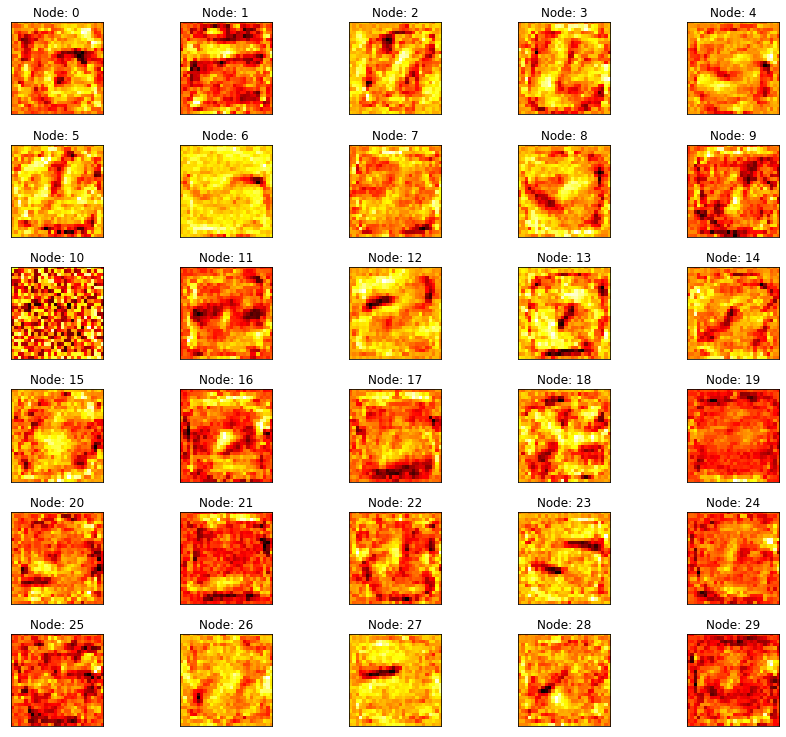

In [171]:
activations = np.swapaxes(np.asarray(model.get_layer("1").weights[0] + model.get_layer("1").weights[1]), 0, 1)

fig = plt.figure()
for i in range(0,activations.shape[0]):
  plt.subplot(int(activations.shape[0]/5) + 1,5,i+1)
  plt.tight_layout()
  plt.imshow(activations[i].reshape(28,28), cmap='hot', interpolation='none')
  plt.title("Node: {}".format(i))
  plt.xticks([])
  plt.yticks([])